In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("C:/Users/ragha/OneDrive/Desktop/df_modcloth.csv")
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [4]:
print(df.head())
print(df.info())

   item_id       user_id  rating                  timestamp  size  fit  \
0     7443          Alex       4  2010-01-21 08:00:00+00:00   NaN  NaN   
1     7443  carolyn.agan       3  2010-01-27 08:00:00+00:00   NaN  NaN   
2     7443         Robyn       4  2010-01-29 08:00:00+00:00   NaN  NaN   
3     7443            De       4  2010-02-13 08:00:00+00:00   NaN  NaN   
4     7443         tasha       4  2010-02-18 08:00:00+00:00   NaN  NaN   

  user_attr model_attr category brand  year  split  
0     Small      Small  Dresses   NaN  2012      0  
1       NaN      Small  Dresses   NaN  2012      0  
2     Small      Small  Dresses   NaN  2012      0  
3       NaN      Small  Dresses   NaN  2012      0  
4     Small      Small  Dresses   NaN  2012      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     99893 non-null  int64  
 1   

In [5]:
df = df.dropna()

In [6]:
target_column = df.columns[-1]  # Assuming the last column is the target
print(f'Target column identified: {target_column}')

Target column identified: split


In [7]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [8]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2447
           1       0.27      0.02      0.04       207
           2       0.27      0.07      0.11       432

    accuracy                           0.78      3086
   macro avg       0.45      0.35      0.34      3086
weighted avg       0.69      0.78      0.71      3086



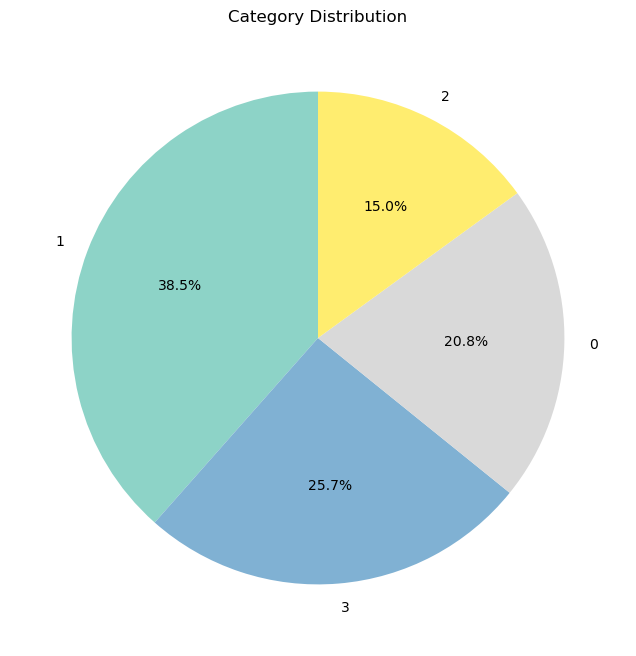

In [14]:
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,cmap='Set3', figsize=(8,8))
plt.title('Category Distribution')
plt.ylabel('')
plt.show()

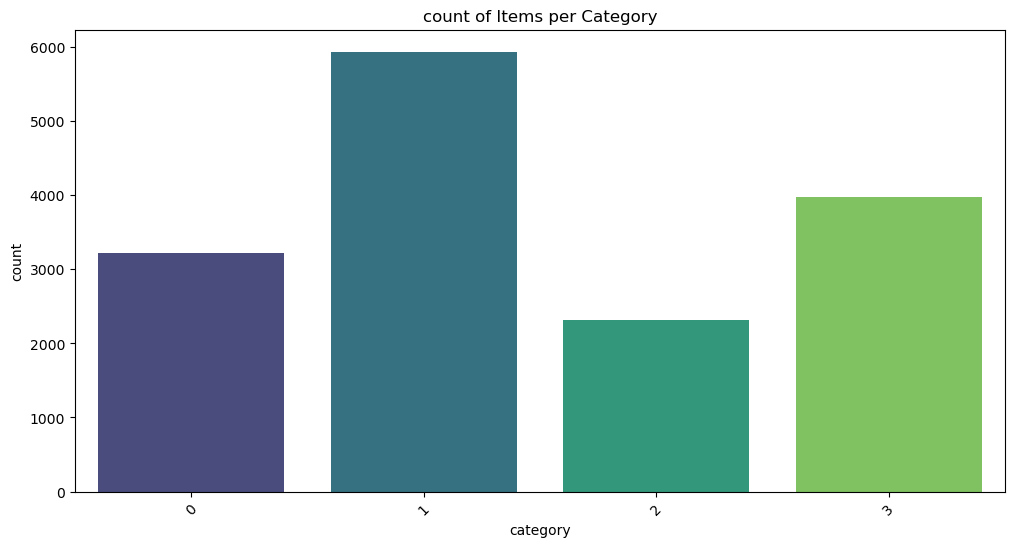

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='category', palette='viridis')
plt.xticks(rotation=45)
plt.title('count of Items per Category')
plt.xlabel('category')
plt.ylabel('count')
plt.show()

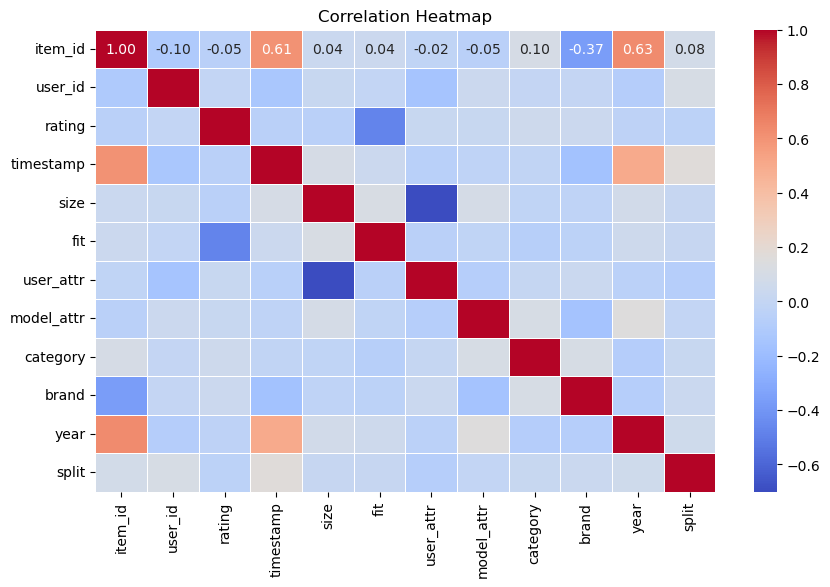

In [18]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\ragha\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


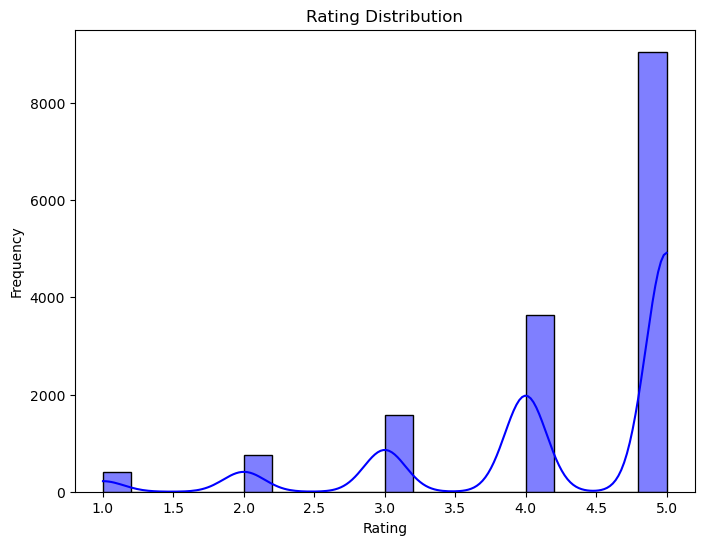

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(df['rating'], bins=20, kde=True, color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()